In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_excel('Airlines+Data.xlsx')

In [3]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
data.shape

(96, 2)

<AxesSubplot:>

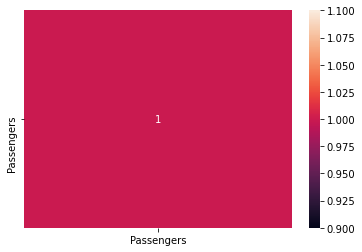

In [7]:
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:>

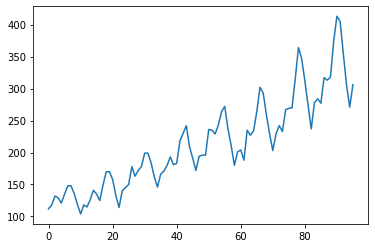

In [8]:
data['Passengers'].plot()

In [9]:
data['Month'].unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [10]:
data['Date'] = pd.to_datetime(data.Month, format='%b-%y')
data['Month'] = data.Date.dt.strftime('%b')
data['Year'] = data.Date.dt.strftime('%y')

<AxesSubplot:xlabel='Month', ylabel='Year'>

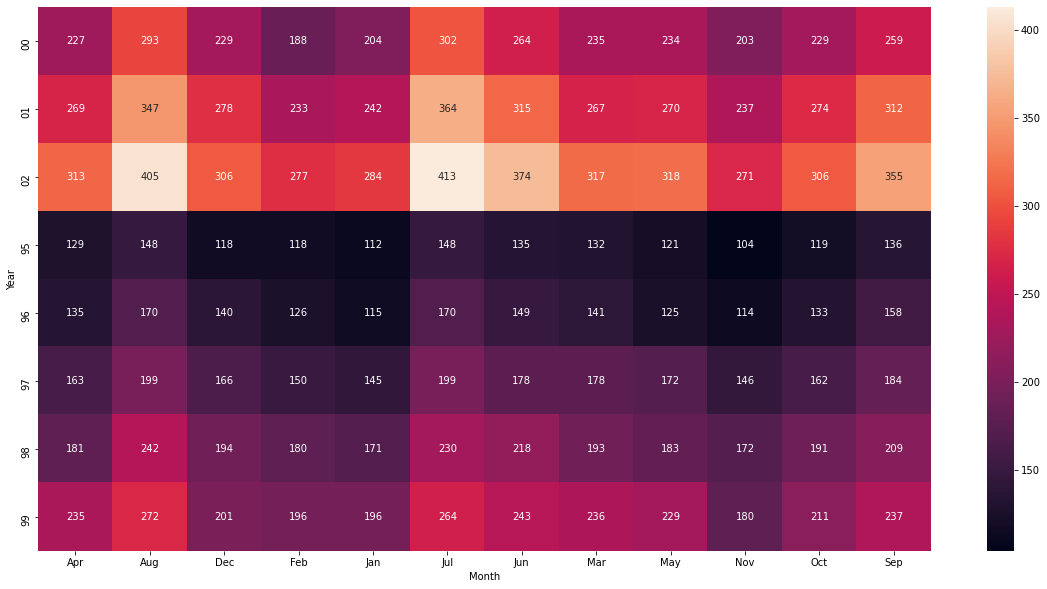

In [11]:
plt.figure(figsize=(20,10))
hmap_of_Month = pd.pivot_table(data = data,values='Passengers',index='Year',columns='Month',aggfunc='mean',fill_value=0)
sns.heatmap(hmap_of_Month,annot=True,fmt='g')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

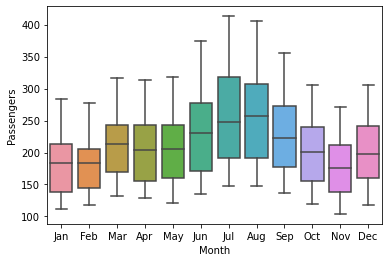

In [12]:
#Boxplot
sns.boxplot(x = 'Month', y = 'Passengers', data = data)

In [13]:
#Creating dummies
Month_dummies = pd.DataFrame(pd.get_dummies(data['Month']))
data1 = pd.concat([data, Month_dummies], axis = 1)

In [14]:
data1.head()


,Month,Passengers,Date,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,112,1995-01-01,95,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,118,1995-02-01,95,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,132,1995-03-01,95,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,129,1995-04-01,95,1,0,0,0,0,0,0,0,0,0,0,0
4,May,121,1995-05-01,95,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"]*data1["t"]

In [18]:

data1["Log_Passengers"] = np.log(data1['Passengers'])


<AxesSubplot:xlabel='Year', ylabel='Passengers'>

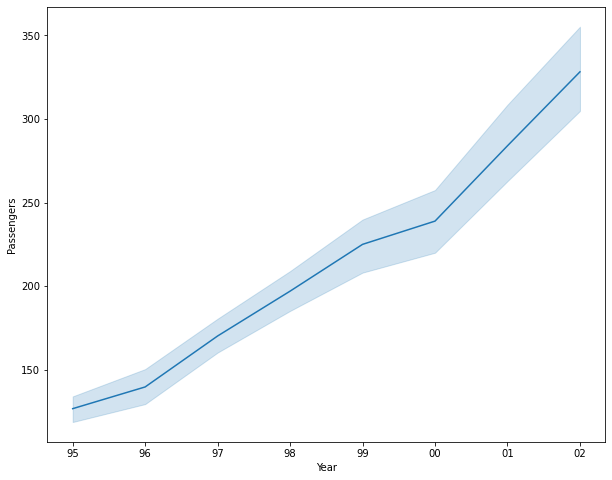

In [19]:
plt.figure(figsize=(10,8))
sns.lineplot(x = 'Year', y = 'Passengers', data = data1)

In [20]:
data1.shape


(96, 19)

In [21]:
Train = data1.head(80)
Test = data1.tail(16)

<AxesSubplot:>

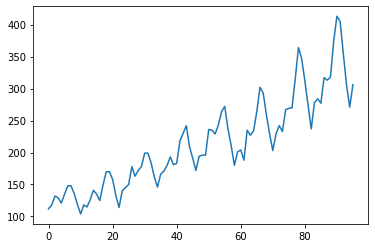

In [22]:
data1.Passengers.plot()

# Linear

In [24]:
import statsmodels.formula.api as smf
linear_model = smf.ols("Passengers~t",data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [25]:
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726734

# Exponential

In [26]:
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334317

# Quadratic

In [27]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584248

# Additive

In [28]:

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea


129.2664764144331

# Multiplicative

In [29]:
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621096

# Multiplicative Additive

In [31]:
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.469000230303434

# Additive Quadratic

In [32]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2)) 
rmse_add_sea_quad

23.910983570107113

In [33]:
data_table = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data_table)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


In [34]:
#Inference
#RMSE-wise, Multiplicative Additive Seasonality model is the best fit